In [51]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df=pd.read_html(url, header=0)[0]
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [3]:
df1=df[df.Borough!= 'Not assigned']
df2=df1.groupby('Postal code').agg({'Borough': 'first', 'Neighborhood': ','.join}).reset_index()
import numpy as np
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned', df2['Borough'], df2['Neighborhood'])
df2

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [4]:
lat_lon =pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [5]:
lat_lon.rename(columns={'Postal Code':'Postal code'}, inplace=True)
df2.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [6]:
df3 = pd.merge(df2,lat_lon,on='Postal code')
df3.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [7]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto'
dfTorontoEastYork=pd.read_html(url, header=0)[9]
dfTorontoEastYork

,Riding,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3,Ethnic Group #5,%.4,Ethnic Group #6,%.5
0,Willowdale,117405,White,33.1,Chinese,25.3,West Asian,10.9,Korean,10.3,South Asian,5.9,Filipino,5.4
1,Eglinton-Lawrence,112925,White,67.7,Filipino,10.7,Black,5.5,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley North,109060,Chinese,31.3,White,29.4,South Asian,10.2,West Asian,7.6,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,White,25.4,Black,22.8,Latin American,9.5,Southeast Asian,8.9,Filipino,5.5,NaN,NaN
4,York Centre,103760,White,53.1,Filipino,16.5,Black,7.9,Latin American,5.1,NaN,NaN,NaN,NaN
5,Don Valley West,101790,White,57.9,South Asian,13.3,Chinese,10.6,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,White,40.9,South Asian,17.1,Black,9.3,Chinese,7.5,Filipino,7.4,West Asian,5.5


In [8]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto'
dfNorthYork=pd.read_html(url, header=0)[10]
dfNorthYork

,Riding,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3,Ethnic Group #5,%.4
0,Scarborough Centre,110450,White,29.4,South Asian,25.6,Filipino,12.5,Black,9.6,Chinese,9.3
1,Scarborough Southwest,108295,White,42.0,South Asian,21.6,Black,11.2,Filipino,9.0,Chinese,5.8
2,Scarborough-Agincourt,104225,Chinese,45.8,White,19.1,South Asian,14.0,Black,6.3,Filipino,5.4
3,Scarborough-Rouge Park,101445,South Asian,32.6,White,26.8,Black,15.9,Filipino,8.7,NaN,NaN
4,Scarborough-Guildwood,101115,South Asian,33.2,White,27.6,Black,14.3,Filipino,7.9,Chinese,5.4
5,Scarborough North,97610,Chinese,45.0,South Asian,26.1,Black,7.6,White,7.6,Filipino,6.4


In [9]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto'
dfEtobicokeAndYork=pd.read_html(url, header=0)[12]
dfEtobicokeAndYork

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from geopy.geocoders import Nominatim
import requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [9]:
import json

In [10]:
CLIENT_ID = 'WREKFROBMZAO540BWRQR0QW1XOB0WKCBRBKKUB1M51RADAKW'
CLIENT_SECRET = 'Y2RGQNOH2ATHIWJJQWZST2W2OZIPCWHZ0RDCOZZTPAU4JCM2'
VERSION = '20180604'
LIMIT = 30

In [11]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


43.6534817 -79.3839347


In [12]:
near = 'Toronto, CA'
search_query = 'Peruvian'
print(search_query + '.....OK!')

Peruvian.....OK!


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={},{}&v={}&query={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET, latitude, longitude, VERSION, search_query, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WREKFROBMZAO540BWRQR0QW1XOB0WKCBRBKKUB1M51RADAKW&client_secret=Y2RGQNOH2ATHIWJJQWZST2W2OZIPCWHZ0RDCOZZTPAU4JCM2&near=43.6534817,-79.3839347&v=20180604&query=Peruvian&limit=30'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e937c6571c428001ba4bfd4'},
 'response': {'venues': [{'id': '518fd9e5498edbdacb8d8a0e',
    'name': 'Pisco Peruvian Cuisine',
    'location': {'address': '3249 Yonge St',
     'lat': 43.72896548616577,
     'lng': -79.40312502479364,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.72896548616577,
       'lng': -79.40312502479364}],
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['3249 Yonge St', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8',
      'name': 'Peruvian Restaurant',
      'pluralName': 'Peruvian Restaurants',
      'shortName': 'Peruvian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586724193',
    'hasPerk': False},
   {'id': '5dbf34c8e037cb0008dfa51b',
    'name': 'Carmen y Pepe Peruvian Cuisine',
    'location': {'a

In [15]:
venues = results ['response']['venues']
dataframe = json_normalize(venues)
dataframe


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'P...",False,518fd9e5498edbdacb8d8a0e,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,NaN,ON,Pisco Peruvian Cuisine,v-1586724193
1,"[{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'P...",False,5dbf34c8e037cb0008dfa51b,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K 2C1,ON,Carmen y Pepe Peruvian Cuisine,v-1586724193
2,"[{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'P...",False,54430ae9498e4180ba2ff241,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,NaN,ON,Paracas,v-1586724193
3,"[{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'P...",False,5a1a2d27ad17892423c678bb,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C 1B5,ON,Kay Pacha,v-1586724193
4,"[{'id': '4bf58dd8d48988d1be941735', 'name': 'L...",False,4e94bca0722e02c231c3449a,1272 Speers Rd,CA,Oakville,Canada,"[1272 Speers Rd, Oakville ON, Canada]","[{'label': 'display', 'lat': 43.425828, 'lng':...",43.425828,-79.710101,NaN,ON,Machu Picchu Peruvian Restaurant,v-1586724193


In [16]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,NaN,ON,518fd9e5498edbdacb8d8a0e
1,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K 2C1,ON,5dbf34c8e037cb0008dfa51b
2,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,NaN,ON,54430ae9498e4180ba2ff241
3,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C 1B5,ON,5a1a2d27ad17892423c678bb
4,Machu Picchu Peruvian Restaurant,Latin American Restaurant,1272 Speers Rd,CA,Oakville,Canada,"[1272 Speers Rd, Oakville ON, Canada]","[{'label': 'display', 'lat': 43.425828, 'lng':...",43.425828,-79.710101,NaN,ON,4e94bca0722e02c231c3449a


In [52]:
venues_map = folium.Map(location=[latitude,longitude], zoom_start=10)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto, CA',
    fill=True,
    fill_color='red',
    fill_opacity=0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng], 
        radius=5, 
        color='blue', 
        popup=label, 
        fill=True, 
        fill_color='blue', 
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

In [20]:
dfPeruvianRestaurant=dataframe_filtered[dataframe_filtered.name!="Machu Picchu Peruvian Restaurant"]
dfPeruvianRestaurant

,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,NaN,ON,518fd9e5498edbdacb8d8a0e
1,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K 2C1,ON,5dbf34c8e037cb0008dfa51b
2,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C 1B5,ON,5a1a2d27ad17892423c678bb
3,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,NaN,ON,54430ae9498e4180ba2ff241


In [21]:
dfPeruvianRestaurant['postalCode'].fillna('M4N', inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
dfPeruvianRestaurant1=dfPeruvianRestaurant.replace(to_replace = 'M3K 2C1', value = 'M3K')
dfPeruvianRestaurant1

,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,M4N,ON,518fd9e5498edbdacb8d8a0e
1,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K,ON,5dbf34c8e037cb0008dfa51b
2,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C 1B5,ON,5a1a2d27ad17892423c678bb
3,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,M4N,ON,54430ae9498e4180ba2ff241


In [23]:
dfPeruvianRestaurant2=dfPeruvianRestaurant1.replace(to_replace = 'M6C 1B5', value = 'M6C')
dfPeruvianRestaurant2

,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,M4N,ON,518fd9e5498edbdacb8d8a0e
1,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K,ON,5dbf34c8e037cb0008dfa51b
2,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C,ON,5a1a2d27ad17892423c678bb
3,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,M4N,ON,54430ae9498e4180ba2ff241


In [24]:
dfPeruvianRestaurant2.rename(columns={'postalCode':'Postal code'}, inplace=True)
dfPeruvianRestaurant2

,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,Postal code,state,id
0,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,M4N,ON,518fd9e5498edbdacb8d8a0e
1,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,M3K,ON,5dbf34c8e037cb0008dfa51b
2,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,M6C,ON,5a1a2d27ad17892423c678bb
3,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,M4N,ON,54430ae9498e4180ba2ff241


In [25]:
dfPeruvianRestaurant3 = pd.merge(df3, dfPeruvianRestaurant2, on = 'Postal code')
dfPeruvianRestaurant3

,Postal code,Borough,Neighborhood,Latitude,Longitude,name,categories,address,cc,city,country,formattedAddress,labeledLatLngs,lat,lng,state,id
0,M3K,North York,Downsview,43.737473,-79.464763,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,CA,North York,Canada,"[40 Carl Hall Rd, North York ON M3K 2C1, Canada]","[{'label': 'display', 'lat': 43.751127, 'lng':...",43.751127,-79.480103,ON,5dbf34c8e037cb0008dfa51b
1,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,CA,Toronto,Canada,"[3249 Yonge St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72896548616577...",43.728965,-79.403125,ON,518fd9e5498edbdacb8d8a0e
2,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Paracas,Peruvian Restaurant,992 St Clair Ave W,CA,Toronto,Canada,"[992 St Clair Ave W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67939, 'lng': ...",43.679390,-79.436953,ON,54430ae9498e4180ba2ff241
3,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,CA,Toronto,Canada,"[744 St Clair Ave W, Toronto ON M6C 1B5, Canada]","[{'label': 'display', 'lat': 43.68141, 'lng': ...",43.681410,-79.427892,ON,5a1a2d27ad17892423c678bb


In [26]:
dfPeruvianRestaurant3.drop(['formattedAddress', 'labeledLatLngs', 'lat', 'lng', 'id', 'cc','Latitude', 'Longitude'], axis=1, inplace=True)

In [27]:
dfPeruvianRestaurant3.rename(columns={'name':'Restaurant Name','categories':'Restaurant','address':'Address','city':'City','country':'Country'},inplace=True)
dfPeruvianRestaurant3

,Postal code,Borough,Neighborhood,Restaurant Name,Restaurant,Address,City,Country,state
0,M3K,North York,Downsview,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,North York,Canada,ON
1,M4N,Central Toronto,Lawrence Park,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,Toronto,Canada,ON
2,M4N,Central Toronto,Lawrence Park,Paracas,Peruvian Restaurant,992 St Clair Ave W,Toronto,Canada,ON
3,M6C,York,Humewood-Cedarvale,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,Toronto,Canada,ON


In [28]:
dfPeruvianRestaurant4=dfPeruvianRestaurant3.set_index('Borough')
dfPeruvianRestaurant4

,Postal code,Neighborhood,Restaurant Name,Restaurant,Address,City,Country,state
Borough,,,,,,,,
North York,M3K,Downsview,Carmen y Pepe Peruvian Cuisine,Peruvian Restaurant,40 Carl Hall Rd,North York,Canada,ON
Central Toronto,M4N,Lawrence Park,Pisco Peruvian Cuisine,Peruvian Restaurant,3249 Yonge St,Toronto,Canada,ON
Central Toronto,M4N,Lawrence Park,Paracas,Peruvian Restaurant,992 St Clair Ave W,Toronto,Canada,ON
York,M6C,Humewood-Cedarvale,Kay Pacha,Peruvian Restaurant,744 St Clair Ave W,Toronto,Canada,ON


In [29]:
dfPeruvianRestCities=dfPeruvianRestaurant4.groupby(['Borough','Restaurant'])['Restaurant'].count()
dfPeruvianRestCities

Borough          Restaurant         
Central Toronto  Peruvian Restaurant    2
North York       Peruvian Restaurant    1
York             Peruvian Restaurant    1
Name: Restaurant, dtype: int64

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Borough vs No of Peruvian Restaurants')

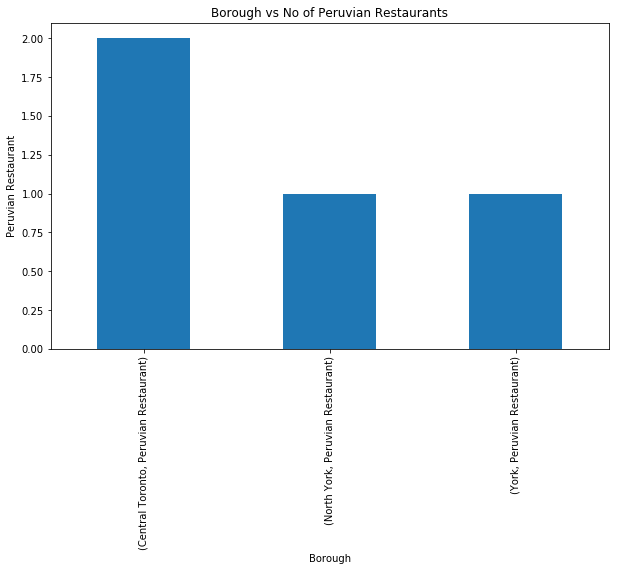

In [154]:
#Relationship between Borough and Peruvian Restaurants
dfPeruvianRestCities.plot(x='Borough',kind='bar', figsize=(10,6))

plt.xlabel('Borough')
plt.ylabel('Peruvian Restaurant')
plt.title('Borough vs No of Peruvian Restaurants')

In [155]:
#Relationship Between Neighborhood and Latin American Population
DFNeighbourhoods = pd.concat([dfTorontoEastYork, dfNorthYork, dfEtobicokeAndYork], ignore_index=True, sort=False)
DFNeighbourhoods

,Riding,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3,Ethnic Group #5,%.4,Ethnic Group #6,%.5
0,Spadina-Fort York,114315,White,56.3,Chinese,14.8,South Asian,8.3,Black,5.1,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,White,64.5,South Asian,10.9,Black,6.6,Chinese,5.7,NaN,NaN,NaN,NaN
2,Davenport,107395,White,66.9,Black,6.4,Chinese,5.9,Latin American,5.4,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,White,72.4,Black,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,White,65.5,Chinese,12.3,South Asian,5.4,Black,5.0,NaN,NaN,NaN,NaN
5,Toronto-St. Paul's,104940,White,70.8,Black,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,University-Rosedale,100520,White,66.5,Chinese,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Toronto Centre,99590,White,48.8,South Asian,11.8,Chinese,11.1,Black,9.1,NaN,NaN,NaN,NaN
8,Willowdale,117405,White,33.1,Chinese,25.3,West Asian,10.9,Korean,10.3,South Asian,5.9,Filipino,5.4
9,Eglinton-Lawrence,112925,White,67.7,Filipino,10.7,Black,5.5,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
DFNeighbourhoods1= DFNeighbourhoods.set_index('Riding')
DFNeighbourhoods

,Riding,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3,Ethnic Group #5,%.4,Ethnic Group #6,%.5
0,Spadina-Fort York,114315,White,56.3,Chinese,14.8,South Asian,8.3,Black,5.1,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,White,64.5,South Asian,10.9,Black,6.6,Chinese,5.7,NaN,NaN,NaN,NaN
2,Davenport,107395,White,66.9,Black,6.4,Chinese,5.9,Latin American,5.4,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,White,72.4,Black,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,White,65.5,Chinese,12.3,South Asian,5.4,Black,5.0,NaN,NaN,NaN,NaN
5,Toronto-St. Paul's,104940,White,70.8,Black,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,University-Rosedale,100520,White,66.5,Chinese,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Toronto Centre,99590,White,48.8,South Asian,11.8,Chinese,11.1,Black,9.1,NaN,NaN,NaN,NaN
8,Willowdale,117405,White,33.1,Chinese,25.3,West Asian,10.9,Korean,10.3,South Asian,5.9,Filipino,5.4
9,Eglinton-Lawrence,112925,White,67.7,Filipino,10.7,Black,5.5,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
DFNeighbourhoods2 = DFNeighbourhoods1.loc[['Davenport', 'Humber River-Black Creek', 'York Centre','York South-Weston']]
DFNeighbourhoods2

,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3,Ethnic Group #5,%.4,Ethnic Group #6,%.5
Riding,,,,,,,,,,,,,
Davenport,107395,White,66.9,Black,6.4,Chinese,5.9,Latin American,5.4,NaN,NaN,NaN,NaN
Humber River-Black Creek,107725,White,25.4,Black,22.8,Latin American,9.5,Southeast Asian,8.9,Filipino,5.5,NaN,NaN
York Centre,103760,White,53.1,Filipino,16.5,Black,7.9,Latin American,5.1,NaN,NaN,NaN,NaN
York South-Weston,115130,White,44.2,Black,23.2,Latin American,8.5,Filipino,5.9,South Asian,5.7,NaN,NaN


In [158]:
DFNeighbourhoods2.drop(['Ethnic Group #1', '%', 'Ethnic Group #2', '%.1', 'Ethnic Group #5', '%.4', 'Ethnic Group #6', '%.5'], axis=1, inplace=True)

In [159]:
DFNeighbourhoods3=DFNeighbourhoods2.rename(columns={'Ethnic Group #3': 'Ethnicity2', '%.2': 'Percentage', 'Ethnic Group #4': 'Ethnicity1', '%.3': 'Percentage1'})
DFNeighbourhoods3

,Population,Ethnicity2,Percentage,Ethnicity1,Percentage1
Riding,,,,,
Davenport,107395,Chinese,5.9,Latin American,5.4
Humber River-Black Creek,107725,Latin American,9.5,Southeast Asian,8.9
York Centre,103760,Black,7.9,Latin American,5.1
York South-Weston,115130,Latin American,8.5,Filipino,5.9


In [160]:
DF=DFNeighbourhoods3.replace(to_replace = "Chinese", value = "Latin American")
DF.reset_index()

,Riding,Population,Ethnicity2,Percentage,Ethnicity1,Percentage1
0,Davenport,107395,Latin American,5.9,Latin American,5.4
1,Humber River-Black Creek,107725,Latin American,9.5,Southeast Asian,8.9
2,York Centre,103760,Black,7.9,Latin American,5.1
3,York South-Weston,115130,Latin American,8.5,Filipino,5.9


In [161]:
DF1=DF.replace(to_replace = "Black", value = "Latin American")
DF1.reset_index()

,Riding,Population,Ethnicity2,Percentage,Ethnicity1,Percentage1
0,Davenport,107395,Latin American,5.9,Latin American,5.4
1,Humber River-Black Creek,107725,Latin American,9.5,Southeast Asian,8.9
2,York Centre,103760,Latin American,7.9,Latin American,5.1
3,York South-Weston,115130,Latin American,8.5,Filipino,5.9


In [162]:
DF1.drop(['Ethnicity1', 'Percentage1', 'Percentage'], axis=1, inplace=True)

In [163]:
DF2=DF1.rename(columns={'Ethnicity2': 'Ethnicity'})
DF2.reset_index()

,Riding,Population,Ethnicity
0,Davenport,107395,Latin American
1,Humber River-Black Creek,107725,Latin American
2,York Centre,103760,Latin American
3,York South-Weston,115130,Latin American


In [164]:
Percentage = ['5.4','9.5','5.1','8.5']
DF2['Percentage'] = Percentage
DF3=DF2.reset_index()
DF3

,Riding,Population,Ethnicity,Percentage
0,Davenport,107395,Latin American,5.4
1,Humber River-Black Creek,107725,Latin American,9.5
2,York Centre,103760,Latin American,5.1
3,York South-Weston,115130,Latin American,8.5


In [165]:
DF3.sort_values("Percentage",axis=0, ascending=True, inplace=True)
DF3

,Riding,Population,Ethnicity,Percentage
2,York Centre,103760,Latin American,5.1
0,Davenport,107395,Latin American,5.4
3,York South-Weston,115130,Latin American,8.5
1,Humber River-Black Creek,107725,Latin American,9.5


Text(0.5, 1.0, 'Neighbourhood vs Latin American Population')

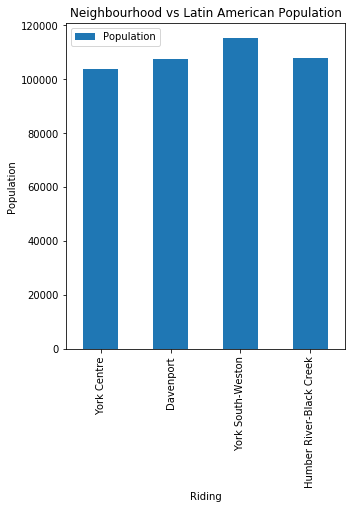

In [98]:
DF3.plot(x="Riding",kind='bar', figsize=(5,6))

plt.xlabel('Riding')
plt.ylabel('Population')
plt.title('Neighbourhood vs Latin American Population')

In [18]:
CLIENT_ID = 'WREKFROBMZAO540BWRQR0QW1XOB0WKCBRBKKUB1M51RADAKW'
CLIENT_SECRET = 'Y2RGQNOH2ATHIWJJQWZST2W2OZIPCWHZ0RDCOZZTPAU4JCM2'
VERSION = '20180604'
LIMIT = 150

In [19]:
near = 'Toronto, CA'
search_query = 'Restaurant'
print(search_query + '.....OK!')

Restaurant.....OK!


In [20]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={},{}&v={}&query={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET, latitude, longitude, VERSION, search_query, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WREKFROBMZAO540BWRQR0QW1XOB0WKCBRBKKUB1M51RADAKW&client_secret=Y2RGQNOH2ATHIWJJQWZST2W2OZIPCWHZ0RDCOZZTPAU4JCM2&near=43.6534817,-79.3839347&v=20180604&query=Restaurant&limit=150'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e937d8d542890001bef4262'},
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586724258',
    'hasPerk': False},
   {'id': '4ada5d5bf964a520e92121

In [22]:
venues = results ['response']['venues']
dataframe1 = json_normalize(venues)
dataframe1

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1586724258,NaN
1,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ada5d5bf964a520e92121e3,35 Church St,CA,Toronto,Canada,at Front St E,"[35 Church St (at Front St E), Toronto ON M5E ...","[{'label': 'display', 'lat': 43.64882370529773...",43.648824,-79.373702,NaN,M5E 1T3,ON,The Hot House Restaurant & Bar,v-1586724258,NaN
2,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4ad4c05cf964a52006f620e3,37 King Street East,CA,Toronto,Canada,at Le Meridien King Edward Hotel,[37 King Street East (at Le Meridien King Edwa...,"[{'label': 'display', 'lat': 43.64929834396347...",43.649298,-79.376431,NaN,M5C 1E9,ON,Victoria's Restaurant,v-1586724258,498556908
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4ae29812f964a520288f21e3,309 Spadina Ave.,CA,Toronto,Canada,btwn Dundas St. W & D'Arcy St.,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,"[{'label': 'display', 'lat': 43.65386562507761...",43.653866,-79.398334,NaN,M5T 2E6,ON,Swatow Restaurant 汕頭小食家,v-1586724258,NaN
4,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",False,4b266f05f964a520657b24e3,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,Goldstone Noodle Restaurant 金石,v-1586724258,NaN
5,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4b074bb1f964a52077fb22e3,353 Spadina Ave.,CA,Toronto,Canada,NaN,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]","[{'label': 'display', 'lat': 43.65533674412141...",43.655337,-79.398897,NaN,M5T 2G3,ON,New Sky Restaurant 小沙田食家,v-1586724258,NaN
6,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4ad4c060f964a5207ff720e3,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,Rol San Restaurant 龍笙棧,v-1586724258,NaN
7,"[{'id': '52af3b773cf9994f4e043c03', 'name': 'S...",False,5750b013498e755287c6de97,988 Baldwin Street,CA,Toronto,Canada,NaN,"[988 Baldwin Street, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655874, 'lng':...",43.655874,-79.393826,NaN,NaN,ON,Some Time BBQ Grill Restaurant 碳烤屋,v-1586724258,NaN
8,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",False,4ad4c05cf964a520dff520e3,301 Front St W,CA,Toronto,Canada,301 Front St. W,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,360 Restaurant,v-1586724258,NaN
9,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4aef8854f964a5201cd921e3,287 King St. W,CA,Toronto,Canada,at John St.,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,NaN,M5V 1J5,ON,Aroma Fine Indian Restaurant,v-1586724258,NaN


In [30]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe1_filtered = dataframe1.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
dataframe1_filtered['categories'] = dataframe1_filtered.apply(get_category_type, axis=1)
dataframe1_filtered.columns = [column.split('.')[-1] for column in dataframe1_filtered.columns]

dataframe1_filtered

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,The Hot House Restaurant & Bar,American Restaurant,35 Church St,CA,Toronto,Canada,at Front St E,"[35 Church St (at Front St E), Toronto ON M5E ...","[{'label': 'display', 'lat': 43.64882370529773...",43.648824,-79.373702,NaN,M5E 1T3,ON,4ada5d5bf964a520e92121e3
2,Victoria's Restaurant,Restaurant,37 King Street East,CA,Toronto,Canada,at Le Meridien King Edward Hotel,[37 King Street East (at Le Meridien King Edwa...,"[{'label': 'display', 'lat': 43.64929834396347...",43.649298,-79.376431,NaN,M5C 1E9,ON,4ad4c05cf964a52006f620e3
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,CA,Toronto,Canada,btwn Dundas St. W & D'Arcy St.,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,"[{'label': 'display', 'lat': 43.65386562507761...",43.653866,-79.398334,NaN,M5T 2E6,ON,4ae29812f964a520288f21e3
4,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,4b266f05f964a520657b24e3
5,New Sky Restaurant 小沙田食家,Chinese Restaurant,353 Spadina Ave.,CA,Toronto,Canada,NaN,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]","[{'label': 'display', 'lat': 43.65533674412141...",43.655337,-79.398897,NaN,M5T 2G3,ON,4b074bb1f964a52077fb22e3
6,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,4ad4c060f964a5207ff720e3
7,Some Time BBQ Grill Restaurant 碳烤屋,Szechuan Restaurant,988 Baldwin Street,CA,Toronto,Canada,NaN,"[988 Baldwin Street, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655874, 'lng':...",43.655874,-79.393826,NaN,NaN,ON,5750b013498e755287c6de97
8,360 Restaurant,Wine Bar,301 Front St W,CA,Toronto,Canada,301 Front St. W,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,4ad4c05cf964a520dff520e3
9,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,CA,Toronto,Canada,at John St.,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,NaN,M5V 1J5,ON,4aef8854f964a5201cd921e3


In [31]:
dataframe1_filtered.drop(['address', 'cc', 'city', 'country', 'crossStreet', 'formattedAddress', 'labeledLatLngs', 'neighborhood','state','id'],axis=1, inplace=True)

In [32]:
dataframe1_filtered.head()

,name,categories,lat,lng,postalCode
0,Hemispheres Restaurant & Bistro,American Restaurant,43.654884,-79.385931,M5G 1R3
1,The Hot House Restaurant & Bar,American Restaurant,43.648824,-79.373702,M5E 1T3
2,Victoria's Restaurant,Restaurant,43.649298,-79.376431,M5C 1E9
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,43.653866,-79.398334,M5T 2E6
4,Goldstone Noodle Restaurant 金石,Noodle House,43.652278,-79.398039,M5T 2E4


In [33]:
dataframe1_filtered.sort_values(by=['lat']).head()

,name,categories,lat,lng,postalCode
20,Arriba Restaurant,Restaurant,43.641479,-79.389074,M5V 1J4
21,Sightlines Restaurant,American Restaurant,43.641635,-79.389365,NaN
8,360 Restaurant,Wine Bar,43.642537,-79.387042,M5V 2T6
11,Azure Restaurant & Bar,Restaurant,43.644749,-79.385113,M5V 2X3
18,Victor Restaurant & Bar,Bar,43.645634,-79.391125,M5V 1H3


In [34]:
dataframe1_filtered.round(2).head()

,name,categories,lat,lng,postalCode
0,Hemispheres Restaurant & Bistro,American Restaurant,43.65,-79.39,M5G 1R3
1,The Hot House Restaurant & Bar,American Restaurant,43.65,-79.37,M5E 1T3
2,Victoria's Restaurant,Restaurant,43.65,-79.38,M5C 1E9
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,43.65,-79.40,M5T 2E6
4,Goldstone Noodle Restaurant 金石,Noodle House,43.65,-79.40,M5T 2E4


In [35]:
dfvenues=dataframe1_filtered.rename(columns={'name': 'Restaurant Name', 'lat': 'Latitude', 'lng': 'Longitude', 'postalCode': 'Postal code'})
dfvenues1=dfvenues.round(2)
dfvenues1.head()

,Restaurant Name,categories,Latitude,Longitude,Postal code
0,Hemispheres Restaurant & Bistro,American Restaurant,43.65,-79.39,M5G 1R3
1,The Hot House Restaurant & Bar,American Restaurant,43.65,-79.37,M5E 1T3
2,Victoria's Restaurant,Restaurant,43.65,-79.38,M5C 1E9
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,43.65,-79.40,M5T 2E6
4,Goldstone Noodle Restaurant 金石,Noodle House,43.65,-79.40,M5T 2E4


In [36]:
dfvenues1.dropna(inplace=True)
dfvenues1.head()

,Restaurant Name,categories,Latitude,Longitude,Postal code
0,Hemispheres Restaurant & Bistro,American Restaurant,43.65,-79.39,M5G 1R3
1,The Hot House Restaurant & Bar,American Restaurant,43.65,-79.37,M5E 1T3
2,Victoria's Restaurant,Restaurant,43.65,-79.38,M5C 1E9
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,43.65,-79.40,M5T 2E6
4,Goldstone Noodle Restaurant 金石,Noodle House,43.65,-79.40,M5T 2E4


In [37]:
dfvenues1['Postal Code'] = dfvenues1['Postal code'].str.split(' ').str[0]
dfvenues1.head()

,Restaurant Name,categories,Latitude,Longitude,Postal code,Postal Code
0,Hemispheres Restaurant & Bistro,American Restaurant,43.65,-79.39,M5G 1R3,M5G
1,The Hot House Restaurant & Bar,American Restaurant,43.65,-79.37,M5E 1T3,M5E
2,Victoria's Restaurant,Restaurant,43.65,-79.38,M5C 1E9,M5C
3,Swatow Restaurant 汕頭小食家,Chinese Restaurant,43.65,-79.40,M5T 2E6,M5T
4,Goldstone Noodle Restaurant 金石,Noodle House,43.65,-79.40,M5T 2E4,M5T


In [38]:
dfvenues1.drop(['Postal code'], axis=1, inplace=True)

In [39]:
df3.rename(columns={'Postal code': 'Postal Code'}, inplace=True)
df3.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [40]:
dfRestaurantToronto=pd.merge(df3, dfvenues1,on='Postal Code')
dfRestaurantToronto.head()

,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories,Latitude_y,Longitude_y
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,Matisse Restaurant And Bar,Restaurant,43.67,-79.38
1,M4X,Downtown Toronto,St. James Town / Cabbagetown,43.667967,-79.367675,Tender Trap Restaurant,Chinese Restaurant,43.67,-79.37
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Cottage Restaurant & Lounge,Thai Restaurant,43.66,-79.38
3,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Studio Restaurant,Breakfast Spot,43.66,-79.38
4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Victoria's Restaurant,Restaurant,43.65,-79.38


In [41]:
from sklearn.cluster import KMeans
k=5
Restaurant_Toronto = dfRestaurantToronto.drop(['Postal Code', 'Borough', 'Neighborhood', 'Restaurant Name', 'categories'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(Restaurant_Toronto)
kmeans.labels_

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4], dtype=int32)

In [56]:
dfRestaurantToronto.insert(0, 'Cluster Labels', kmeans.labels_)

In [57]:
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

import matplotlib.cm as cm
import matplotlib.colors as colors

# Color for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(dfRestaurantToronto['Latitude_x'], dfRestaurantToronto['Longitude_y'], dfRestaurantToronto['Neighborhood'], 
                                           dfRestaurantToronto['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
dfRestaurantToronto

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
0,0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,Matisse Restaurant And Bar,Restaurant
1,0,M4X,Downtown Toronto,St. James Town / Cabbagetown,43.667967,-79.367675,Tender Trap Restaurant,Chinese Restaurant
2,0,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Cottage Restaurant & Lounge,Thai Restaurant
3,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Studio Restaurant,Breakfast Spot
4,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Victoria's Restaurant,Restaurant
5,2,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,The Hot House Restaurant & Bar,American Restaurant
6,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hemispheres Restaurant & Bistro,American Restaurant
7,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hong Shing Chinese Restaurant,Chinese Restaurant
8,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hendricks Restaurant & Bar,Restaurant
9,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Cali Restaurant,Vietnamese Restaurant


In [64]:
dfRestaurantToronto.loc[dfRestaurantToronto['Cluster Labels'] == 0]

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
0,0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,Matisse Restaurant And Bar,Restaurant
1,0,M4X,Downtown Toronto,St. James Town / Cabbagetown,43.667967,-79.367675,Tender Trap Restaurant,Chinese Restaurant
2,0,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Cottage Restaurant & Lounge,Thai Restaurant


In [65]:
dfRestaurantToronto.loc[dfRestaurantToronto['Cluster Labels'] == 1]

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
16,1,M5R,Central Toronto,The Annex / North Midtown / Yorkville,43.672710,-79.405678,Sassafraz | Cafe | Restaurant | Private Events,Event Space
17,1,M5S,Downtown Toronto,University of Toronto / Harbord,43.662696,-79.400049,Insomnia Restaurant and Lounge,Restaurant
18,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Swatow Restaurant 汕頭小食家,Chinese Restaurant
19,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Goldstone Noodle Restaurant 金石,Noodle House
20,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,New Sky Restaurant 小沙田食家,Chinese Restaurant
21,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Rol San Restaurant 龍笙棧,Dim Sum Restaurant
22,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Green Tea Restaurant Downtown,Chinese Restaurant
23,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Kensington Cornerstone Restaurant,Breakfast Spot
24,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Ka Chi Korean Restaurant,Korean Restaurant
25,1,M5T,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,Tasty's Caribbean Restaurant & Catering,Caribbean Restaurant


In [66]:
dfRestaurantToronto.loc[dfRestaurantToronto['Cluster Labels'] == 2]

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
3,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Studio Restaurant,Breakfast Spot
4,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Victoria's Restaurant,Restaurant
5,2,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,The Hot House Restaurant & Bar,American Restaurant
6,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hemispheres Restaurant & Bistro,American Restaurant
7,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hong Shing Chinese Restaurant,Chinese Restaurant
8,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Hendricks Restaurant & Bar,Restaurant
9,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Cali Restaurant,Vietnamese Restaurant
10,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Spring Rolls | Japanese Restaurant in Toronto,Theme Restaurant
11,2,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568,Restaurant | Adelaide,Restaurant
12,2,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568,Richtree Natural Market Restaurants,Restaurant


In [67]:
dfRestaurantToronto.loc[dfRestaurantToronto['Cluster Labels'] == 3]

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
27,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,360 Restaurant,Wine Bar
28,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,Aroma Fine Indian Restaurant,Indian Restaurant
29,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,Azure Restaurant & Bar,Restaurant
30,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,Victor Restaurant & Bar,Bar
31,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,Arriba Restaurant,Restaurant
32,3,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.39442,Little India Restaurant,Indian Restaurant


In [68]:
dfRestaurantToronto.loc[dfRestaurantToronto['Cluster Labels'] == 4]

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude_x,Longitude_x,Restaurant Name,categories
33,4,M6G,Downtown Toronto,Christie,43.669542,-79.422564,Imonay House Restaurant 뉴 · 이모네집,Korean Restaurant
34,4,M6J,West Toronto,Little Portugal / Trinity,43.647927,-79.419750,Woodlot Restaurant & Bakery,New American Restaurant
35,4,M6J,West Toronto,Little Portugal / Trinity,43.647927,-79.419750,The Lakeview Restaurant,Diner
